<a href="https://colab.research.google.com/github/ThuanPhong0126/-PT_project/blob/master/source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse

/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse


In [ ]:
import keras
import os
import matplotlib
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path 
from keras.optimizers import Adam
from keras import backend
from keras import optimizers
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

Using TensorFlow backend.


In [ ]:
datagen =  ImageDataGenerator(rescale=1/255.0,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          validation_split=0.2)

In [ ]:
data_dir='Images/images'
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    subset='training')

Found 320 images belonging to 4 classes.


In [ ]:
valid_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    subset='validation')

Found 80 images belonging to 4 classes.


In [ ]:
train_generator.n

320

In [ ]:
def getDataUsingDataGenerators(dataset):
    print(dataset)
    if dataset == 'Train':
     image_generator = train_generator
    elif dataset == 'Validation':
      image_generator = valid_generator
    else:
      image_generator = test_generator
    image_count = 0
    X_batches, Y_batches = [], []
    for X, Y in image_generator:
      X_batches.append(X)
      Y_batches.append(Y)
      image_count += X.shape[0]
      # Must interrupt image_generator
      if image_count >= image_generator.n:
        break
    X = np.concatenate(X_batches)
    Y = np.concatenate(Y_batches)
    return X, Y

In [ ]:
#num_classes = len(class_names)
X, Y = dict(), dict()
for dataset in [ 'Validation', 'Train']:
    # Extract bottleneck features from pretrained model, predicting from "dataset" directory
    X[dataset], Y[dataset] = getDataUsingDataGenerators(dataset)

Validation
Train


In [ ]:
def build_model():
  model = Sequential()
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(units=4,activation="softmax"))
  return model

In [ ]:
model = build_model()
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_7 (Batch (None, 112, 112, 128)    

In [ ]:
model_fit_history = model.fit_generator(train_generator,
        steps_per_epoch=100,
        epochs=50,
        validation_data=valid_generator)

Epoch 1/50
100/100 [==============================] - 312s 3s/step - loss: 1.4603 - accuracy: 0.6556 - val_loss: 4.3268 - val_accuracy: 0.2500
Epoch 2/50
100/100 [==============================] - 73s 731ms/step - loss: 0.4482 - accuracy: 0.8597 - val_loss: 14.9274 - val_accuracy: 0.2500
Epoch 3/50
100/100 [==============================] - 73s 734ms/step - loss: 0.2520 - accuracy: 0.9147 - val_loss: 4.0267 - val_accuracy: 0.2500
Epoch 4/50
100/100 [==============================] - 73s 731ms/step - loss: 0.3041 - accuracy: 0.9197 - val_loss: 12.3113 - val_accuracy: 0.2500
Epoch 5/50
100/100 [==============================] - 73s 731ms/step - loss: 0.1315 - accuracy: 0.9581 - val_loss: 10.8812 - val_accuracy: 0.2500
Epoch 6/50
100/100 [==============================] - 73s 732ms/step - loss: 0.0936 - accuracy: 0.9684 - val_loss: 6.0063 - val_accuracy: 0.2500
Epoch 7/50
100/100 [==============================] - 73s 731ms/step - loss: 0.1482 - accuracy: 0.9606 - val_loss: 3.5968 - val_a

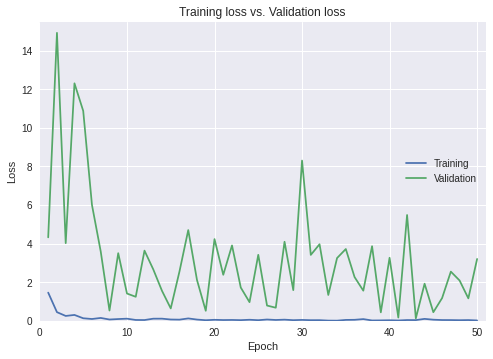

In [ ]:
matplotlib.style.use('seaborn')
epochs = len(model_fit_history.history['loss'])
max_loss = max(max(model_fit_history.history['loss']), max(model_fit_history.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, model_fit_history.history['loss'])
plt.plot(x, model_fit_history.history['val_loss'])
plt.title('Training loss vs. Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

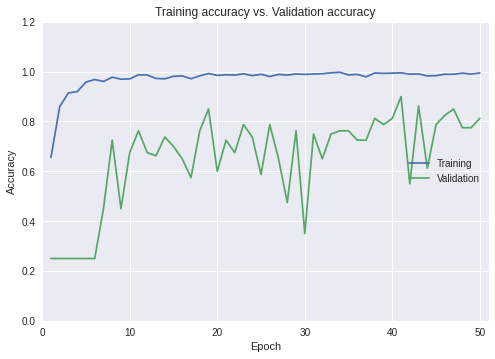

In [ ]:

matplotlib.style.use('seaborn')
epochs = len(model_fit_history.history['accuracy'])
plt.axis([0, epochs+1, 0, 1.2])
x = np.arange(1, epochs+1)
plt.plot(x, model_fit_history.history['accuracy'])
plt.plot(x, model_fit_history.history['val_accuracy'])
plt.title('Training accuracy vs. Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

In [ ]:
model.save('vgg1.h5')

In [ ]:
saved_model=keras.models.load_model("vgg1.h5")

[[2.6367407e-04 3.7097998e-08 9.9999741e+01 1.1112128e-07]]


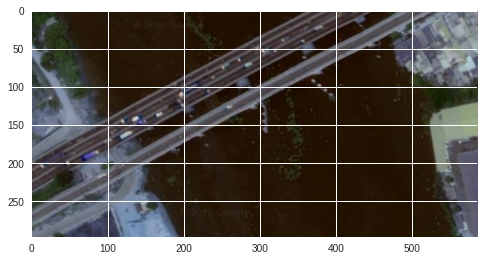

In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/Images/data_tăng_cường/overpass/Copy of overpass17_p.png')
plt.imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(result*100)


In [ ]:
train_generator.class_indices

{'freeway': 0, 'intersection': 1, 'overpass': 2, 'parkinglot': 3}

In [ ]:
model_fit_history = model.fit_generator(train_generator,
        steps_per_epoch=100,
        epochs=150,
        validation_data=valid_generator)

Epoch 1/150
100/100 [==============================] - 77s 765ms/step - loss: 1.4301 - accuracy: 0.6703 - val_loss: 2.9160 - val_accuracy: 0.2500
Epoch 2/150
100/100 [==============================] - 73s 733ms/step - loss: 0.5124 - accuracy: 0.8381 - val_loss: 7.5236 - val_accuracy: 0.2500
Epoch 3/150
100/100 [==============================] - 73s 733ms/step - loss: 0.2150 - accuracy: 0.9256 - val_loss: 7.2138 - val_accuracy: 0.2500
Epoch 4/150
100/100 [==============================] - 73s 732ms/step - loss: 0.1630 - accuracy: 0.9466 - val_loss: 7.6604 - val_accuracy: 0.2500
Epoch 5/150
100/100 [==============================] - 73s 731ms/step - loss: 0.1289 - accuracy: 0.9563 - val_loss: 10.2273 - val_accuracy: 0.2500
Epoch 6/150
100/100 [==============================] - 73s 732ms/step - loss: 0.1374 - accuracy: 0.9594 - val_loss: 2.4819 - val_accuracy: 0.4500
Epoch 7/150
100/100 [==============================] - 73s 731ms/step - loss: 0.1599 - accuracy: 0.9531 - val_loss: 5.0123 

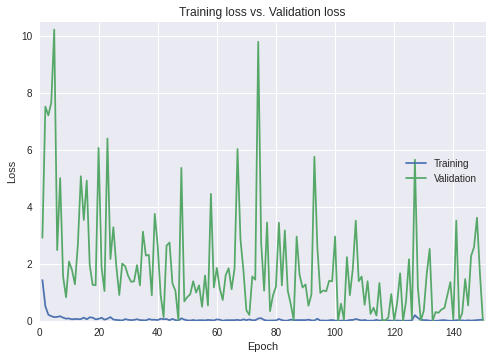

In [ ]:
matplotlib.style.use('seaborn')
epochs = len(model_fit_history.history['loss'])
max_loss = max(max(model_fit_history.history['loss']), max(model_fit_history.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, model_fit_history.history['loss'])
plt.plot(x, model_fit_history.history['val_loss'])
plt.title('Training loss vs. Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

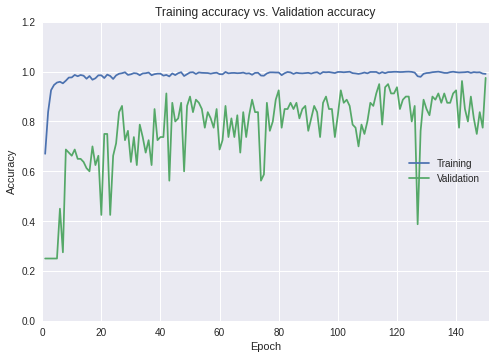

In [ ]:
matplotlib.style.use('seaborn')
epochs = len(model_fit_history.history['accuracy'])
plt.axis([0, epochs+1, 0, 1.2])
x = np.arange(1, epochs+1)
plt.plot(x, model_fit_history.history['accuracy'])
plt.plot(x, model_fit_history.history['val_accuracy'])
plt.title('Training accuracy vs. Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

In [ ]:
model.save('vgg150.h5')

In [ ]:
saved_model=keras.models.load_model("vgg150.h5")

In [ ]:
  from google.colab.patches import cv2_imshow

In [ ]:
def select_label(result):
  index=np.where(result==result.max())[1][0]
  s=f'   ({result.max()*100}%)'
  if index==1: return 'Intersection'+s
  elif index==0: return 'Freeway'+s
  elif index==2: return 'Overpass'+s
  else: return 'Parkinglot'+s

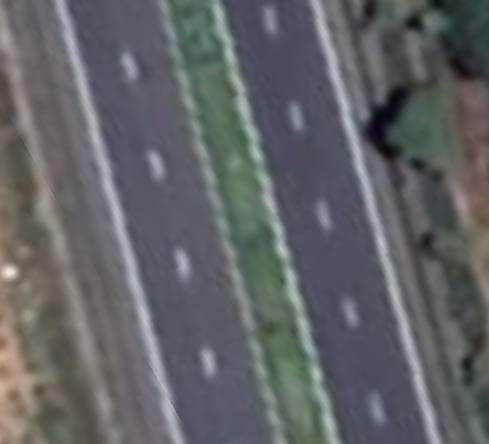

Freeway   (99.82303977012634%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of IMG_3767.PNG')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

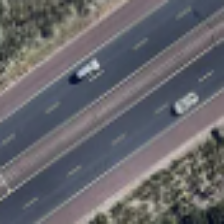

Freeway   (97.1885621547699%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of IMG_3777.PNG')

img=cv2.resize(img,(224,224))
cv2_imshow(img)
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

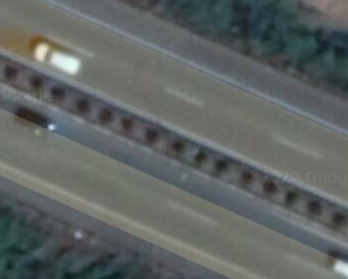

Freeway   (97.53004312515259%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of IMG_3785.JPG')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

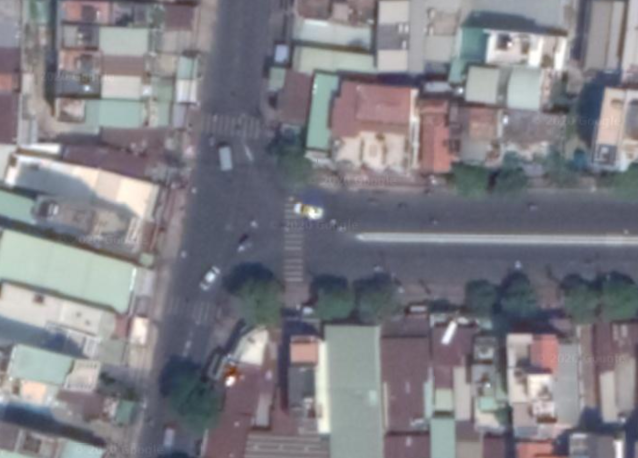

Intersection   (99.99992847442627%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of intersection42_p.png')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

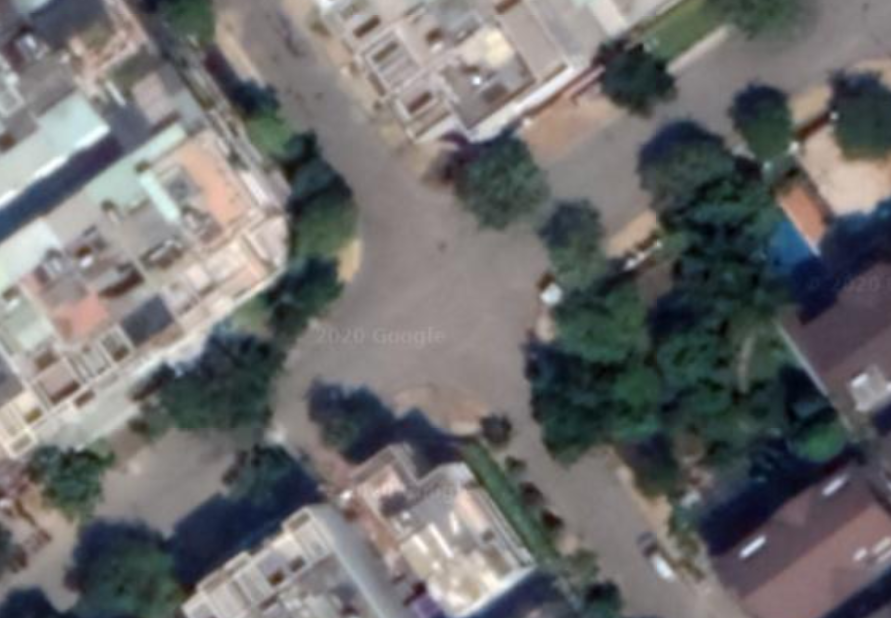

Intersection   (99.62311387062073%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of intersection29_p.png')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

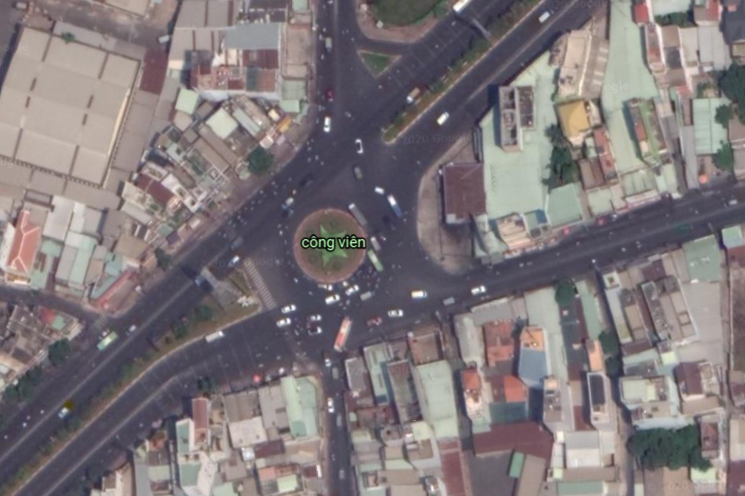

Intersection   (66.70059561729431%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of intersection49_p.png')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

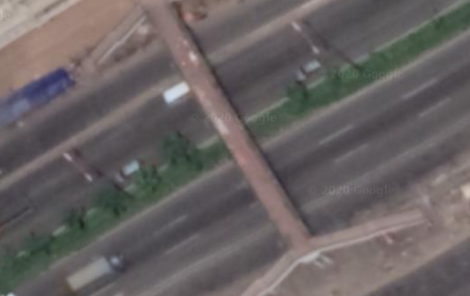

Freeway   (99.47636127471924%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/abcd.png')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

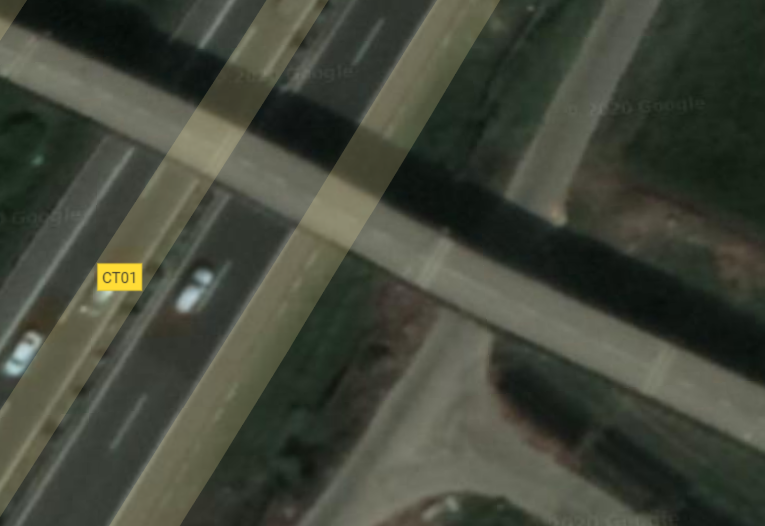

Overpass   (100.0%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of overpass23_p.png')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

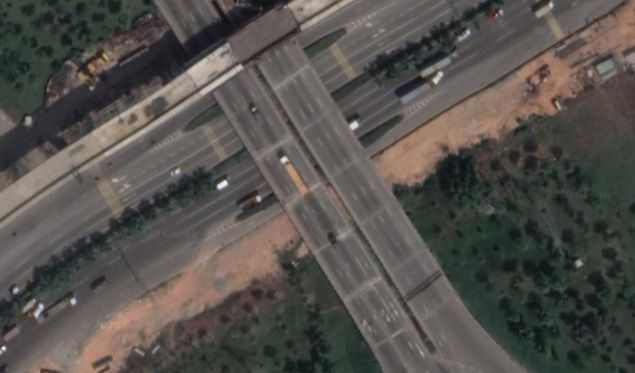

Overpass   (99.99995231628418%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of overpass12_p.png')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

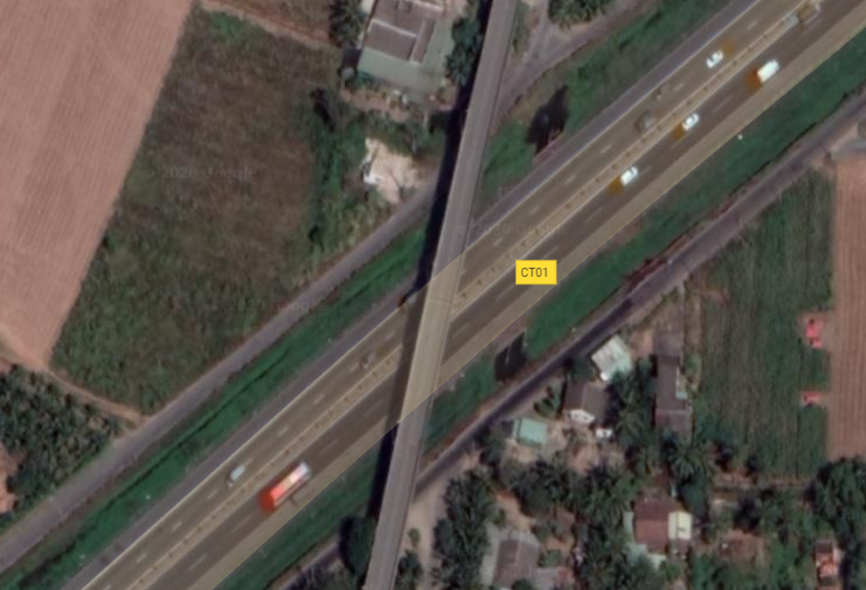

Overpass   (100.0%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of overpass1_p.png')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

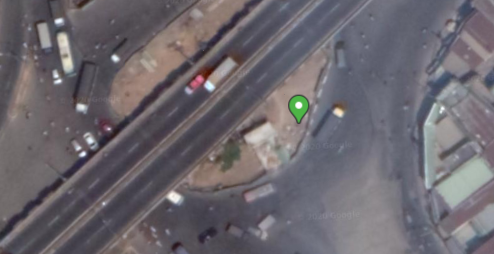

Overpass   (60.52536368370056%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of overpass20_p.png')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

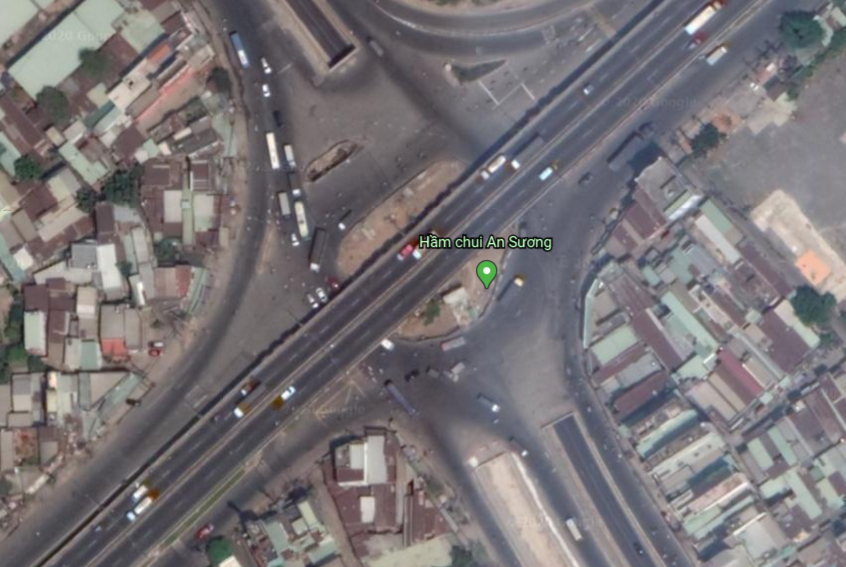

Intersection   (100.0%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/AnSuong.png')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

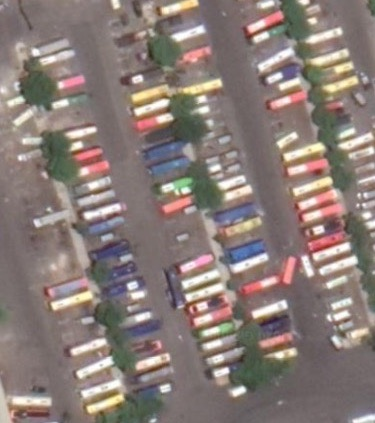

Parkinglot   (100.0%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of IMG_3711.JPG')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

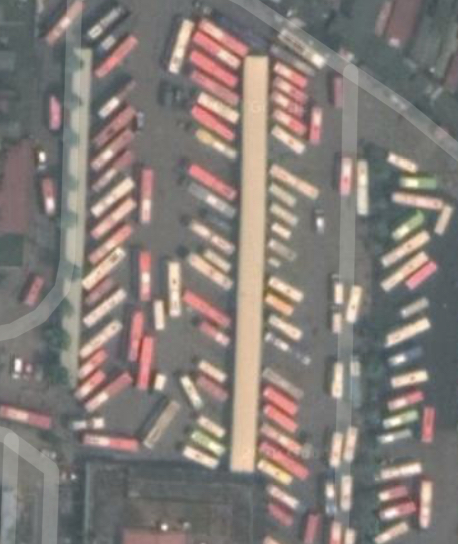

Parkinglot   (99.8220145702362%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of IMG_3741.PNG')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

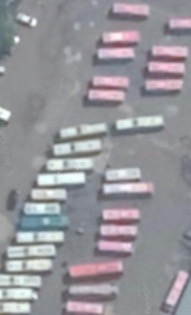

Parkinglot   (66.16215109825134%)


In [ ]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse/abc/Copy of IMG_3716.JPG')
cv2_imshow(img)
img=cv2.resize(img,(224,224))
img=img/255.0
img = np.expand_dims(img, axis=0)
result=saved_model.predict(img)
print(select_label(result))

### Giải theo các Model SVM và RFC

In [ ]:
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import confusion_matrix,classification_report
import seaborn

In [ ]:
trans_label={'freeway': 0, 'intersection': 1, 'overpass': 2, 'parkinglot': 3}

In [ ]:
features=[]
label=[]

In [ ]:
for link in glob.glob('Images/images/*/*'):
  if link.split('/')[-2] in trans_label.keys():
    img=cv2.imread(link)
    img=cv2.resize(img,(224,224))
    img=np.reshape(img,224*224*3)
    features.append(img)
    label.append(trans_label[link.split('/')[-2]])

In [ ]:
len(features)

400

In [ ]:
len(label)

400

In [ ]:
features=[feature/255.0 for feature in features]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2)

In [ ]:
model1=RandomForestClassifier()
model1.fit(X_train,y_train)
predict1=model1.predict(X_test)

In [ ]:
print(classification_report(y_test,predict1))
print(confusion_matrix(y_test,predict1))

              precision    recall  f1-score   support

           0       0.52      0.74      0.61        19
           1       0.68      0.77      0.72        22
           2       0.50      0.25      0.33        20
           3       0.61      0.58      0.59        19

    accuracy                           0.59        80
   macro avg       0.58      0.58      0.57        80
weighted avg       0.58      0.59      0.57        80

[[14  3  0  2]
 [ 4 17  1  0]
 [ 7  3  5  5]
 [ 2  2  4 11]]


In [ ]:
seaborn.set_palette("ch:2.5,-.2,dark=.3")

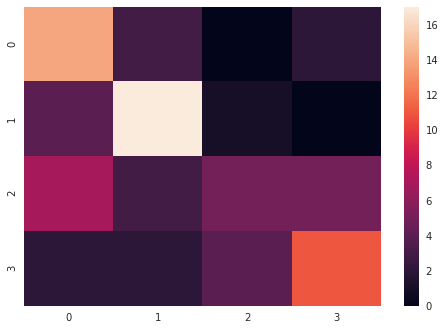

In [ ]:
seaborn.set_palette("ch:2.5,-.2,dark=.3")
seaborn.heatmap(confusion_matrix(y_test,predict1))
plt.show()

In [ ]:
model2=SVC()
model2.fit(X_train,y_train)
predict2=model2.predict(X_test)

In [ ]:
print(classification_report(y_test,predict2))
print(confusion_matrix(y_test,predict2))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.35      0.41      0.38        22
           2       0.58      0.35      0.44        20
           3       0.57      0.63      0.60        19

    accuracy                           0.51        80
   macro avg       0.53      0.52      0.52        80
weighted avg       0.52      0.51      0.51        80

[[13  6  0  0]
 [ 3  9  4  6]
 [ 5  5  7  3]
 [ 0  6  1 12]]


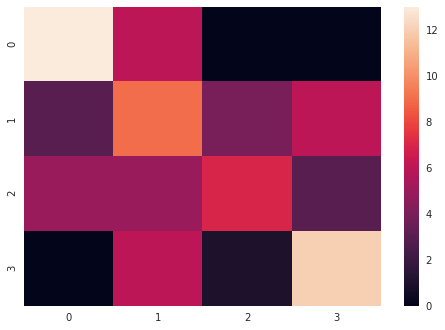

In [ ]:
seaborn.heatmap(confusion_matrix(y_test,predict2))